In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.model.DepthNet import DepthNet
from src.data.image_dataset.val_dataset import ValDataset
from src.data.kitti.dataset import KITTIDataset
from src.data.kitti.utils import image_torch2np
from src.data.kitti.utils import depth_torch2np

In [12]:
half_size = False
model = DepthNet(input_size=(172, 576) if half_size else (344, 1152), share_encoder_for_confidence_prediction=True)
model.load_state_dict(torch.load(os.path.join('src', 'results', 'baseline', 'run_01', 'checkpoints', 'model_checkpoint_040.pth'), weights_only=True))

/home/antoniof/miniconda3/envs/paper0/lib/python3.12/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


DepthNet with ResNet50 and input size (344, 1152) produces the following feature pyramid:
(1, 256, 86, 288)
(1, 512, 43, 144)
(1, 1024, 22, 72)
(1, 2048, 11, 36)



<All keys matched successfully>

In [13]:
kitti = KITTIDataset('val', center_crop=False)
data_set = ValDataset(kitti, half_size=half_size)

torch.Size([3, 344, 1152])


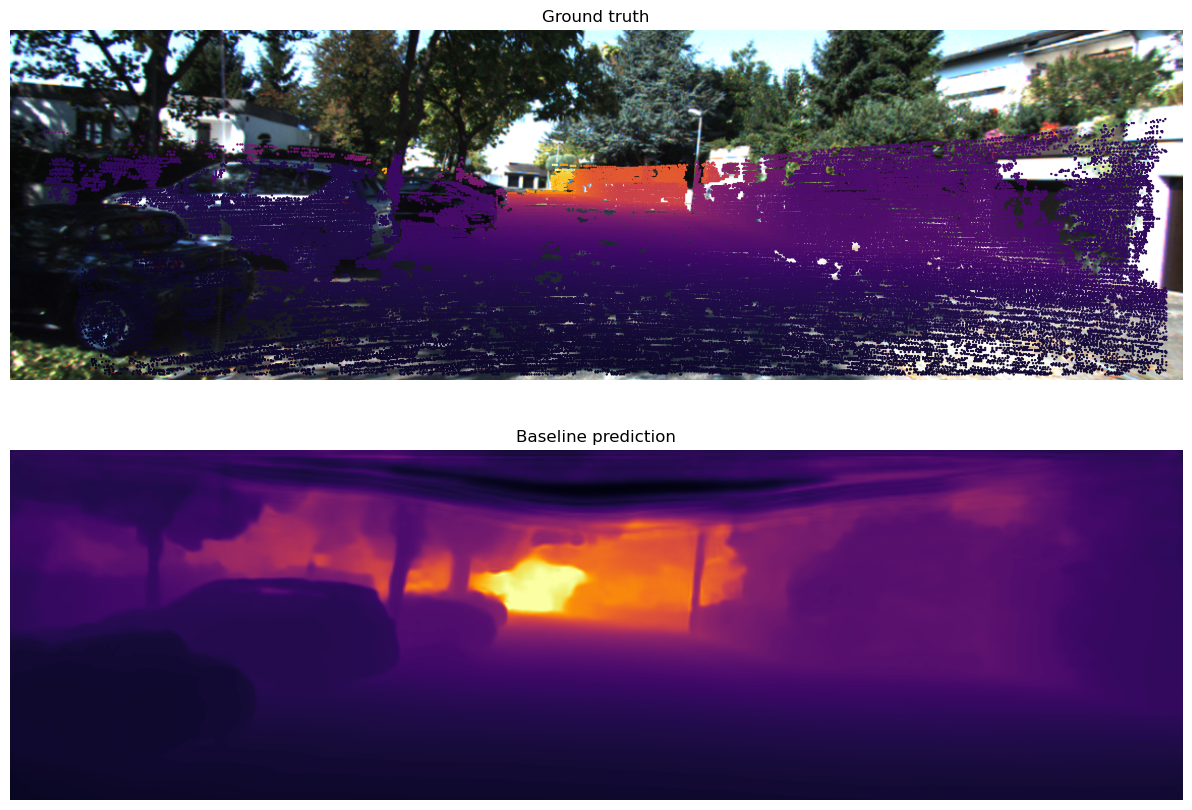

In [14]:
idx = 27
image, gt_depth, velo_depth = data_set[idx]

print(image.shape)

# Ground truth
np_gt_depth = depth_torch2np(gt_depth)
valid = (np_gt_depth > 0)
z = np_gt_depth[valid]
y, x = np.where(valid)

# Prediction
model.eval()
with torch.no_grad():
    pred_depth, _ = model(image[None])
    pred_depth = pred_depth[0]

plt.figure(figsize=(20, 10))
# Plot
plt.subplot(211)
plt.axis("off")
plt.title("Ground truth")
plt.imshow(image_torch2np(image))
plt.scatter(x, y, c=z, cmap='inferno', s=0.5, vmin=kitti.min_depth, vmax=kitti.max_depth)

plt.subplot(212)
plt.axis("off")
plt.title("Baseline prediction")
plt.imshow(np.exp(depth_torch2np(pred_depth)), cmap='inferno', vmin=kitti.min_depth, vmax=kitti.max_depth)

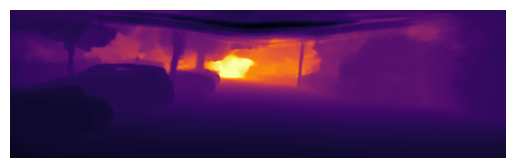

In [15]:
plt.figure(frameon=False)
plt.axis('off')
plt.imshow(np.exp(depth_torch2np(pred_depth)), cmap='inferno', vmin=kitti.min_depth, vmax=kitti.max_depth)